# Unsupervised Machine Learning

-- is a type of ML that learns from data without  Supervision unlike supervised ML Unsupervised ML models a given unlabel data and allowed to discoverd patterns and insithids without any intrections 
there are three Type -
- clustering 
a technique for explorering unleble data and brecking it down groups or clusters base on similaritys or patterns ex. K-means clustering, dbscan
use cases - customer segmentetion, 

- assosiation
is a rule base approach to rivile intresting rletionship between data point in large dataset
ex. recomendetion system, market basket analysis

- dimenality reduction
reduced a the no of features in datasets etracting imp features reducing no of erellevent or random features in datset

-- K-meance cluster
is a centroide based clustering algo tha partition the dataset into simillar groups base on the distence of centroid


--steps 
1 choose a no of clusters
2 initialize the cluster centers 
3 assing data point to nearest (for each conpute the distenc of data point and assing new data point)
4 update cluster center (compute the mean of all point assign to the cluster and update the mean value in data point)
5 repeat step 3-4 untill conversions(untill centroid stop segnificatnly)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Normalization of dataset for better clustering peformance 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [5]:
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# apply K-means clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
df["Clusters"] = kmeans.fit_predict(scaled_df)
df

C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


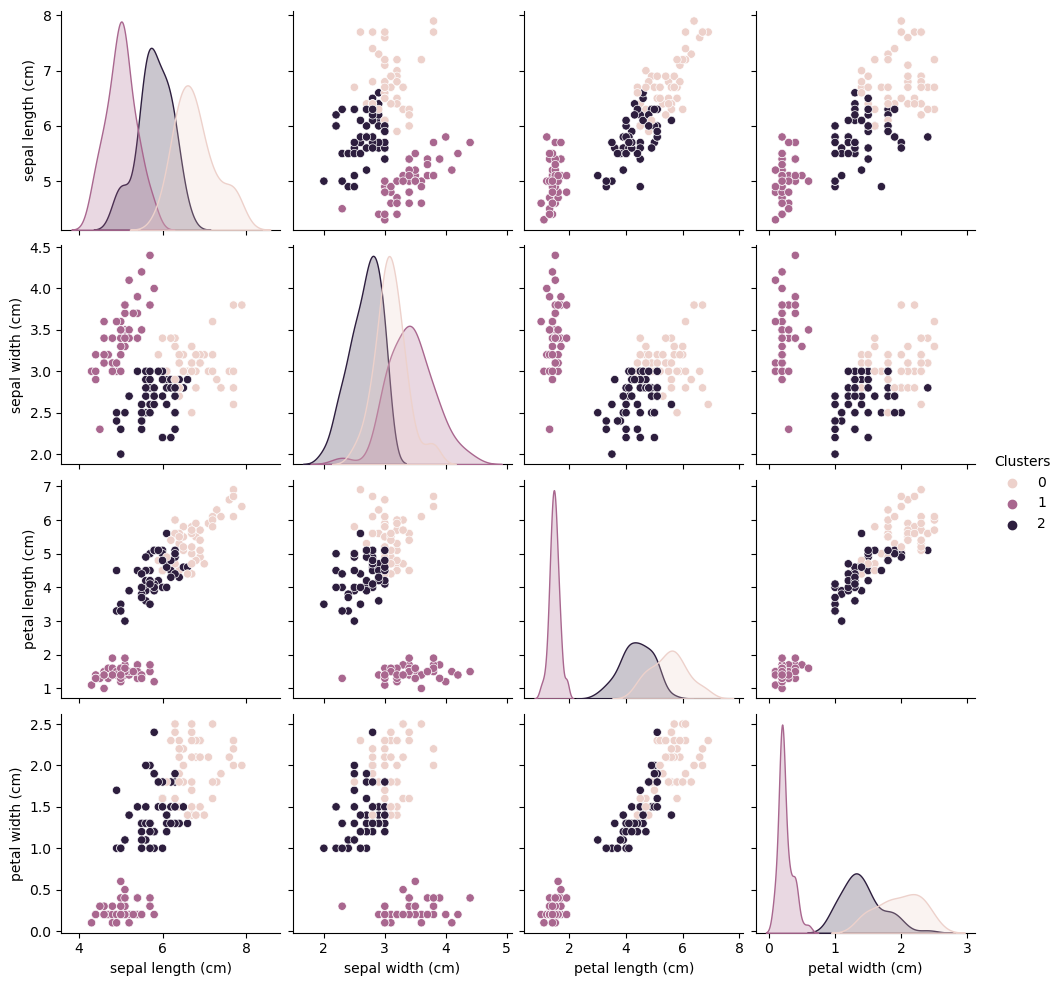

In [13]:
sns.pairplot(df, hue = "Clusters")
plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
wcss = []

for i in range(1,11):
     kmeans= KMeans(n_clusters=i, random_state=42)
     kmeans.fit_predict(scaled_df)
     wcss.append(kmeans.inertia_)

In [23]:
print(wcss)

[600.0000000000001, 222.36170496502308, 139.82049635974982, 114.09254690403088, 90.8072831507854, 80.03687480296514, 70.71964344225337, 62.56490859983996, 54.82772055803483, 47.80110492646868]


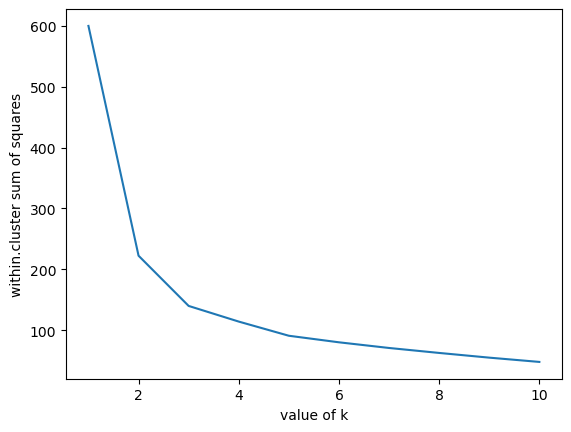

In [26]:
plt.plot(range(1,11), wcss)
plt.xlabel("value of k")
plt.ylabel("within.cluster sum of squares")
plt.show()

### K-Mean color quantization

In [30]:
import matplotlib.image as mpimg

In [40]:


image_as_array = mpimg.imread(r"C:\Users\SANKET\color.jpg")  # Use raw string
print(image_as_array.shape)  # Output: (height, width, channels)


(427, 640, 3)


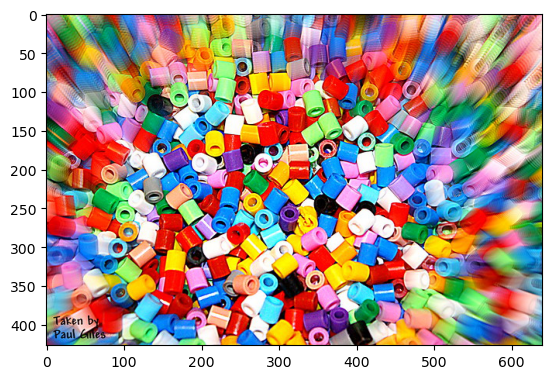

In [42]:
plt.imshow(image_as_array)

In [44]:
h,w,c =image_as_array.shape
image_as_array_2d = image_as_array.reshape(h*w,c)
image_as_array_2d

array([[199, 140, 136],
       [210, 157, 139],
       [212, 168, 131],
       ...,
       [ 86, 206, 119],
       [ 87, 209, 122],
       [ 77, 201, 113]], dtype=uint8)

In [48]:
kmean_color = KMeans(n_clusters=5, random_state=42)
color_labels = kmean_color.fit_predict(image_as_array_2d)
color_labels

array([0, 3, 0, ..., 1, 1, 1])

In [58]:
rgb_codes = kmean_color.cluster_centers_.round(0).astype(int)
rgb_codes

array([[213, 177,  59],
       [ 64, 144, 204],
       [ 55,  71,  64],
       [222, 198, 204],
       [209,  35,  26]])

In [ ]:
quantized_image = np.reshape(rgb_codes[color_labels], (h,w,c))
